Prodigy Infotech Machine Learning Internship

Name :- Sampurna Dey

Task 2 :- Group Customers of retail store Analysis Using K-Means

Objectives

*   Applying K-means clustering with four clusters to the reduced dataset.
*   Selecting the top principal componentts that explain 80% of the variance





In [1]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [2]:
import plotly.express as px
import plotly.graph_objects as go

def box_plot(dataf,y,color,title,height = 600, width =1000):
    fig = px.box(dataf,y=y,color=color,title=title,color_discrete_sequence=['#20bf6b','#fa8231','#eb3b5a'],points="all")
    fig.update_latyout(height=height,width=width,font_color='#484848',template='plotly_white')
    return fig

def bar_plot(dataf,x,y,color,title,x_label='x',y_label='y',height=600,width=1000):
    fig =px.bar(dataf,x=x,y=y,color=color,title=title,color_discrete_sequence=['#20bf6b','#fa8231','#eb3b5a'],barmode="group")
    fig.update_latyout(height=height,width=width,font_color='#484848',template='plotly_white')
    return fig
def scatmat_plot(dataf,dimensions,color,title,height=1500,width=1500):
    fig = px.scatter_matrix(dataf,dimensions=dimensions,color=color,title=title, color_discrete_sequence=['#20bf6b','#fa8231','#eb3b5a'])
    fig.update_traces(diagonal_visible=False)
    fig.update_layout(height=height,width=width,font_color='#484848',template='plotly_white')
    return fig

def corr_plot(x,y,z,title,height=900,width=900):
    trace = go.Figure(go.Heatmap(x=x,y=y,z=z,colorscale=px.colors.diverging.PRGn,zmin=-1,zmax=1))
    trace.update_layout(title=title,height=height,width=width,font_color='#484848')
    trace.update_traces(text=z,texttemplate="%{text:.2f}",hovertemplate=None)
    return trace
def scree_plot(x,y,title,xaxis_title,yaxis_title,height=500,width=500):
    fig = go.Figure(data=go.Scatter(x=x,y=y,mode='Line+markers'))
    fig.update_layout(title='Scree Plot',height=height,width=width,font_color='#484848',template='plotly_white',xaxis_title='Pricipal Component',yaxis_title='Variance Explained')
    fig.update_traces(marker=dict(color-'#46B3B3'))
    return fig
def line_plot(x,y,title,xaxis_title,yaxis_title,height=500,width=500):
    fig = px.line(x=x,y=y,text=y)
    fig.update_layout(title=title,height=height,width=width,font_color='#484848',template='plotly_white',xaxis_title=xaxis_title,yaxis_title=yaxis_title)
    fig.update_traces(marker=dict(color-'#46B3B3'),textposition='top right')
    return fig
def scat_plot(dataf,x,y,color,title,height=600,width=1000):
    fig = px.scatter(dataf,x=x,y=y,title=title,color='Clusters',color_discrete_sequence=['#20bf6b','#fa8231','#eb3b5a'])
    fig.update_layout(height=height,width=width,font_color='#484848',template='plotly_white')
    return fig
def pie_plot(labels,values,title,height=400,width=400):
    fig = go.Figure(go.pie(labels=labels,values=values,marker_colors=['#20bf6b','#fa8231','#eb3b5a'],hole=.1,sort=False))
    fig.update_layout(height=height,width=width,font_color='#484848',template='plotly_white',showlegend=False)
    return fig

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [5]:
customerStore= pd.read_csv('/content/Mall_Customers.csv')
customerStore

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
customerStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customerStore.shape

(200, 5)

In [8]:
customerStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customerStore.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Checking the null values

customerStore.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualizing The Data

In [11]:
import matplotlib.pyplot as plt
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
customerStore['Age Range'] = pd.cut(customerStore['Age'], bins=bins, labels=labels, right=False)

def plot_ratio(customerStore):
    # For viz: Ratio of Males & Females

    x=customerStore.groupby(['Gender'])['Gender'].count()
    y=len(customerStore)
    r=((x/y)).round(2)

    mf_ratio = pd.DataFrame(r).T
    fig, ax = plt.subplots(1,1,figsize=(12, 3), dpi=75)

    ax.barh(mf_ratio.index, mf_ratio['Male'],
            color='#244747', alpha=0.7, label='Male')
    ax.barh(mf_ratio.index, mf_ratio['Female'], left=mf_ratio['Male'],
            color='#91b8bd', alpha=0.7, label='Female')

    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # male percentage
    for i in mf_ratio.index:
        ax.annotate(f"{int(mf_ratio['Male'][i]*100)}%",
                       xy=(mf_ratio['Male'][i]/2, i),
                       va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                       color='white')

        ax.annotate("Male",
                       xy=(mf_ratio['Male'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='white')


    for i in mf_ratio.index:
        ax.annotate(f"{int(mf_ratio['Female'][i]*100)}%",
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, i),
                       va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                       color='#244747')
        ax.annotate("Female",
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='#244747')


    # Title & Subtitle
    fig.text(0.125,1.03,'Male & Female distribution', fontfamily='serif',fontsize=15, fontweight='bold')
    fig.text(0.125,0.92,'We see a fairly even split, but with slightly more females.',fontfamily='serif',fontsize=12)

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Removing legend due to labelled plot
    ax.legend().set_visible(False)
    plt.show()

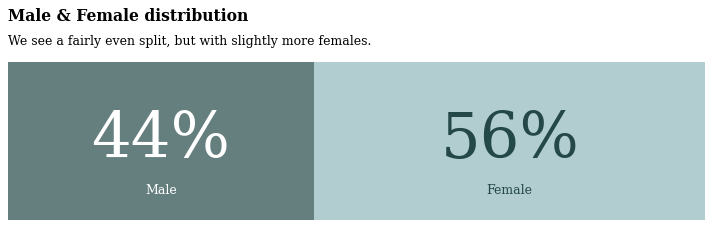

In [12]:
plot_ratio(customerStore)

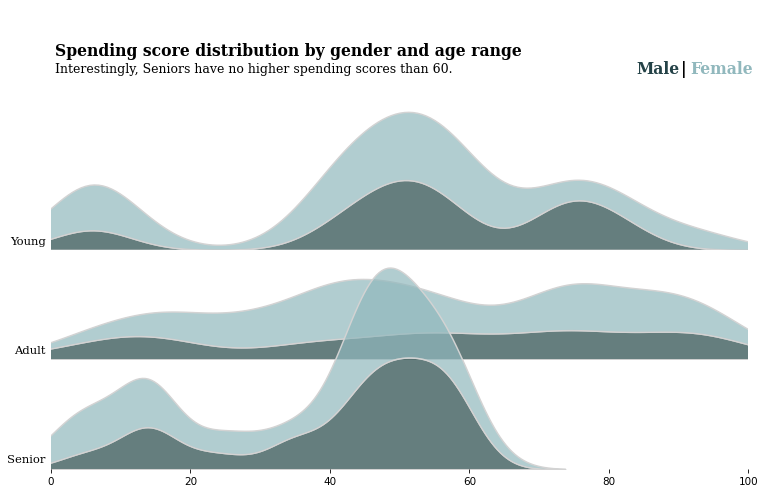

In [13]:
import seaborn as sns
fig = plt.figure(figsize=(12, 8), dpi=75)
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#004c70", "#990000",'#990000']

for idx, cls, c in zip(range(4), customerStore['Age Range'].unique(), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Spending Score (1-100)', data=customerStore[customerStore['Age Range']==cls],
                fill=True, ax=axes[idx], cut=3, bw_method=0.25,
                lw=1.4, edgecolor='lightgray',multiple="stack", palette=['#91b8bd','#244747'], alpha=0.7,hue='Gender')

    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 100)

    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0.001,f'{cls} ',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 4 : axes[idx].get_legend().remove()


fig.text(0.13,0.8,"Spending score distribution by gender and age range", fontweight="bold", fontfamily='serif', fontsize=15)
fig.text(0.13,0.77,'Interestingly, Seniors have no higher spending scores than 60.',fontfamily='serif',fontsize=12)

fig.text(0.776,0.77,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.825,0.77,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,0.77,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()

In [14]:
# Some quick feature engineering, just in case
customerStore['Gender 1/0'] = customerStore['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

customerStore['age_band'] = customerStore['Age'].apply(age_band)

<ipython-input-15-c6807e5dc211>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mf.columns, fontfamily='serif')


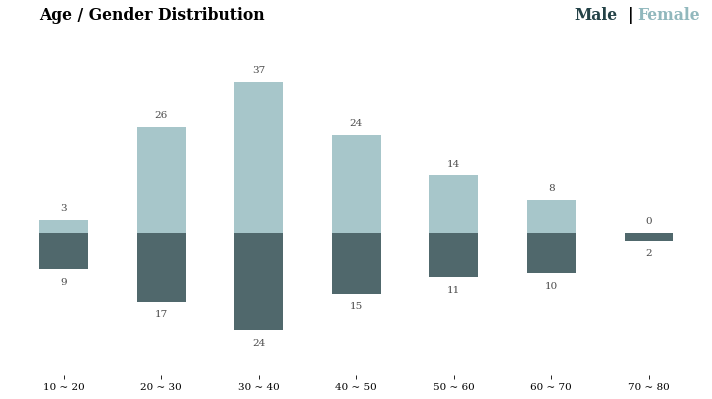

In [15]:
mf = customerStore.groupby('Gender')['age_band'].value_counts().unstack().sort_index().fillna(0).astype(int)


female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=75)
ax.bar(male.index, male, width=0.5, color='#244247', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#91b8bd', alpha=0.8, label='Female')
ax.set_ylim(-35, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}",
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in male.index:
    ax.annotate(f"{-male[i]}",
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()

<ipython-input-16-cecb77de80aa>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)


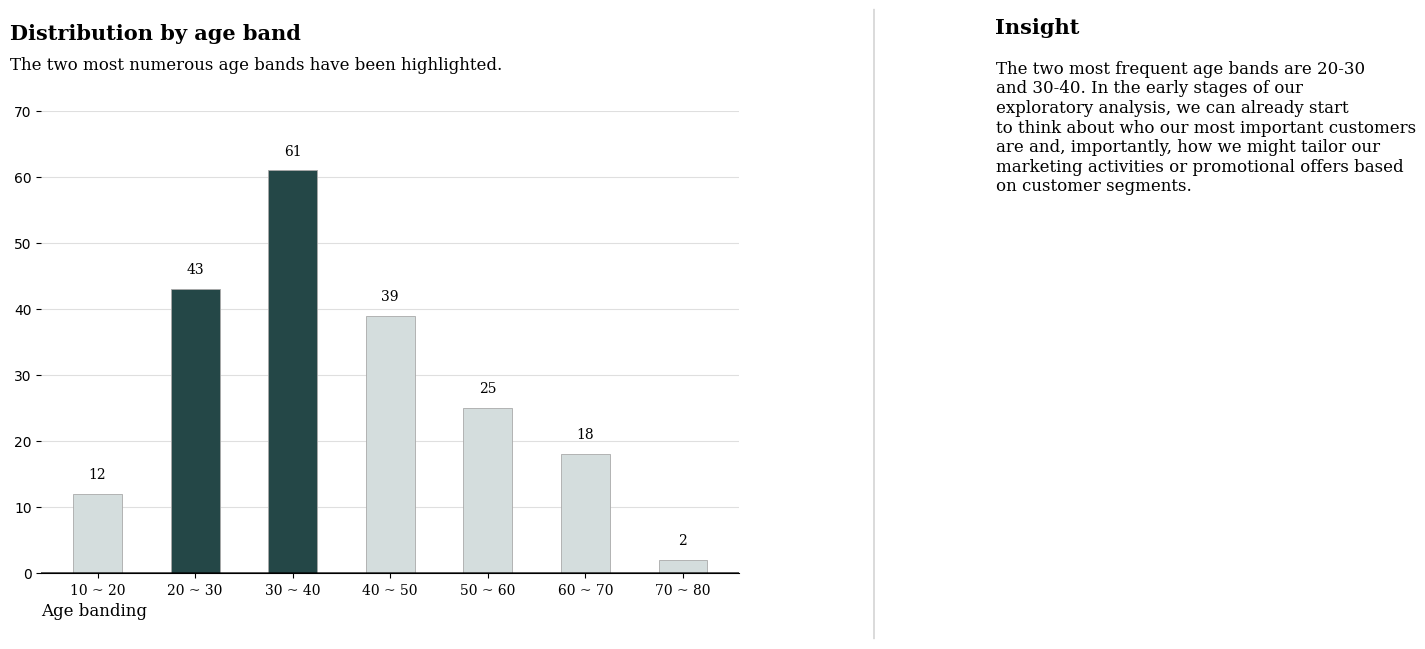

In [16]:
# Order for plotting categorical vars
ab_order = ['10 ~ 20', '20 ~ 30', '30 ~ 40','40 ~ 50','50 ~ 60' ,'60 ~ 70', '70 ~ 80']

data = customerStore['age_band'].value_counts()[ab_order]

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = color_map[1] = '#244747'

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.bar(data.index, data, width=0.5,
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}",
                   xy=(i, data[i] + 3), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)



ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Distribution by age band', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The two most numerous age bands have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.185, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.185, 0.715, '''
The two most frequent age bands are 20-30
and 30-40. In the early stages of our
exploratory analysis, we can already start
to think about who our most important customers
are and, importantly, how we might tailor our
marketing activities or promotional offers based
on customer segments.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)

grid_y_ticks = np.arange(0, 75, 10) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Age banding", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)


# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

import matplotlib.lines as lines
l1 = lines.Line2D([1.05, 1.05], [0, 1.05], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])


plt.show()

<Figure size 1000x600 with 0 Axes>

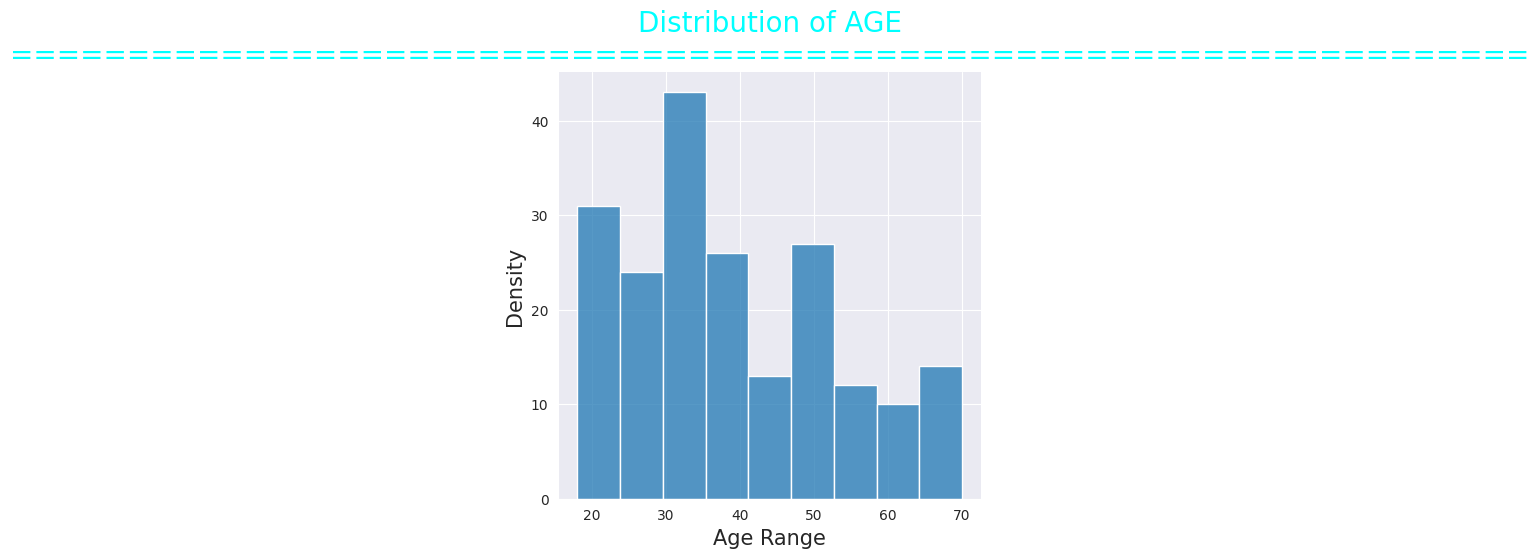

In [17]:
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.displot(customerStore.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="aqua")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

<Figure size 1000x600 with 0 Axes>

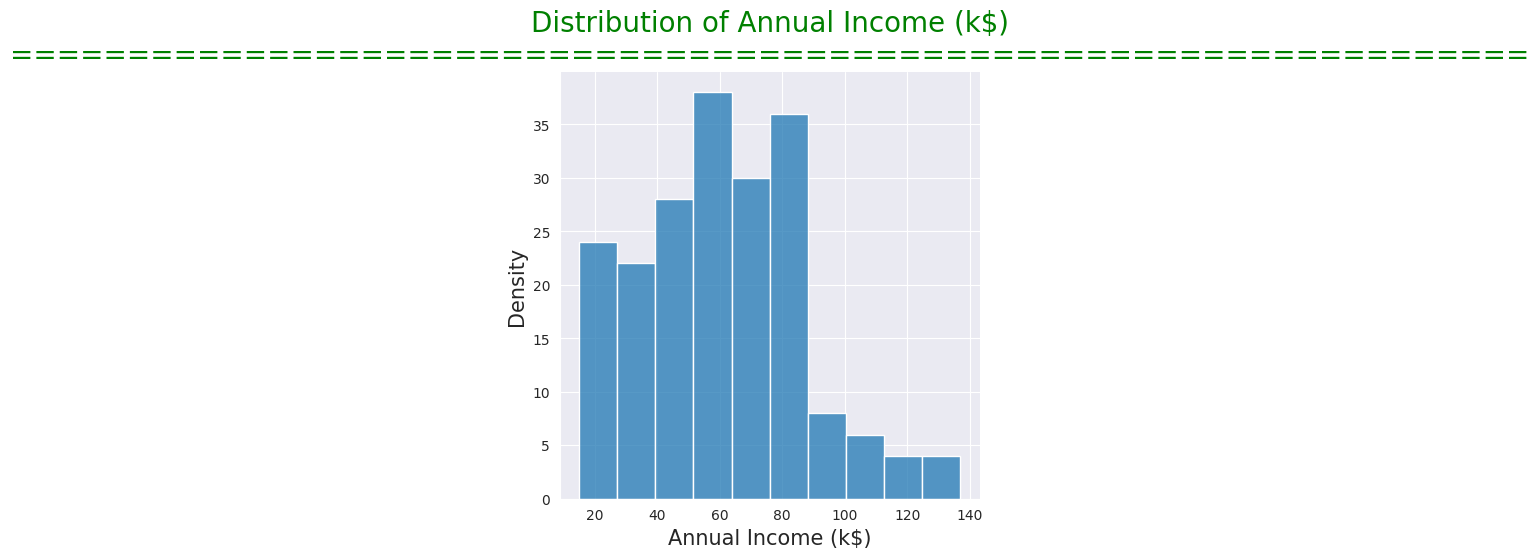

In [18]:
# Annual Income (k$) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.displot(customerStore["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

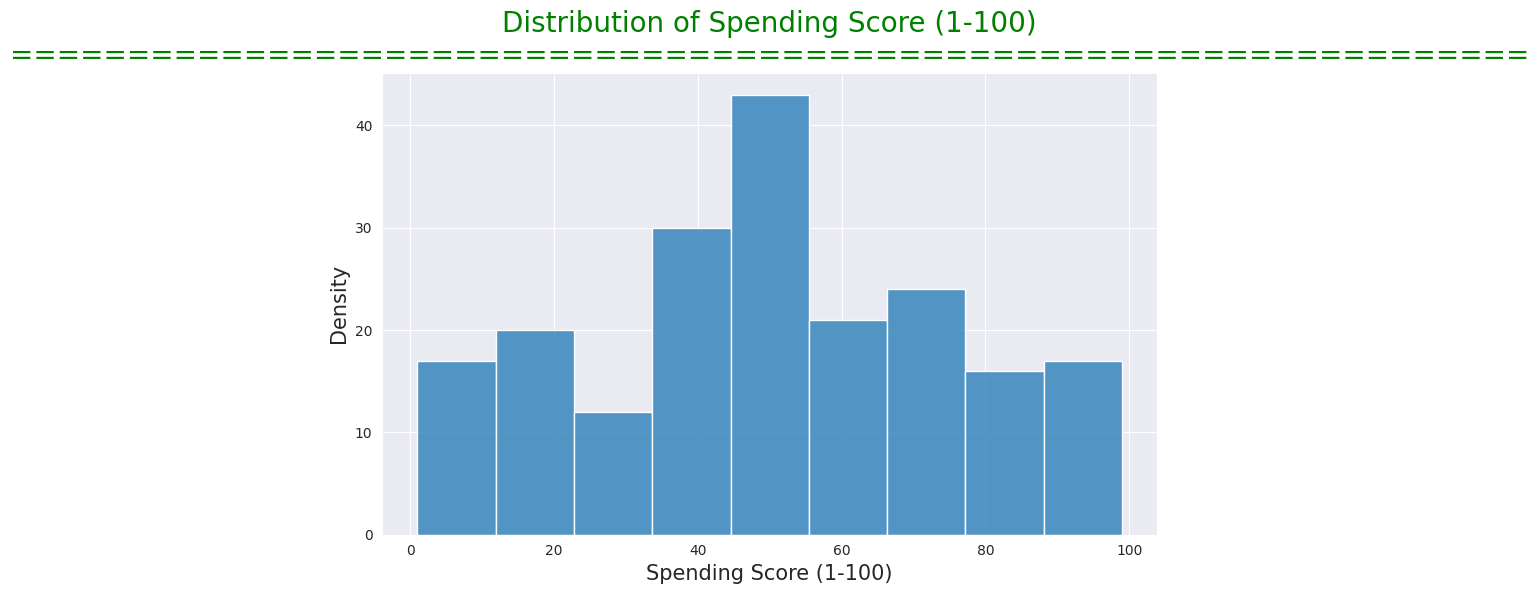

In [19]:
# Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.histplot(customerStore["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

<ipython-input-20-d6d9e813ef31>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(customerStore["Age"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))
<ipython-input-20-d6d9e813ef31>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(customerStore["Spending Sc

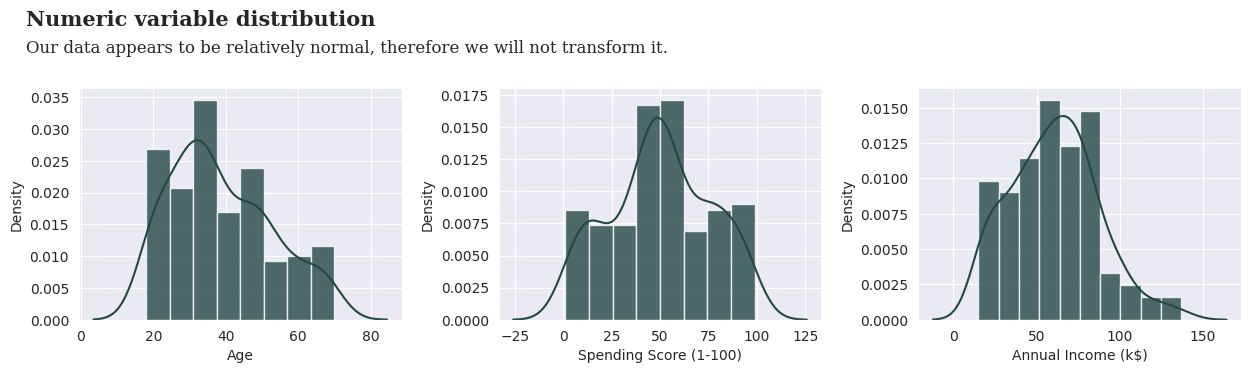

In [20]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))


fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1, 'Our data appears to be relatively normal, therefore we will not transform it.', fontsize=12, fontweight='light', fontfamily='serif')


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.distplot(customerStore["Age"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.distplot(customerStore["Spending Score (1-100)"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.distplot(customerStore["Annual Income (k$)"],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots

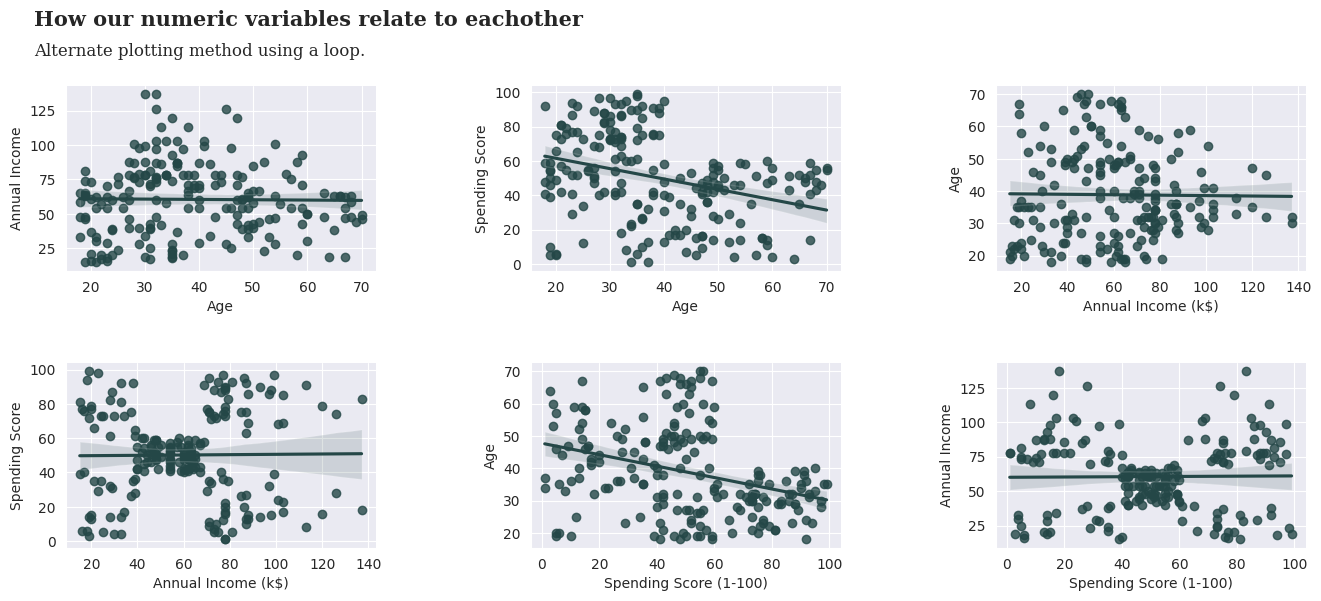

In [21]:
fig = plt.figure(figsize=(16, 6))
# Title and sub-title
fig.text(0.105, .98, 'How our numeric variables relate to eachother', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Alternate plotting method using a loop.', fontsize=12, fontweight='light', fontfamily='serif')

n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x==y: continue

        n += 1
        plt.subplot(2 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = customerStore,color='#244747')
        sns.despine()
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # useful for adjusting space between subplot

plt.show()

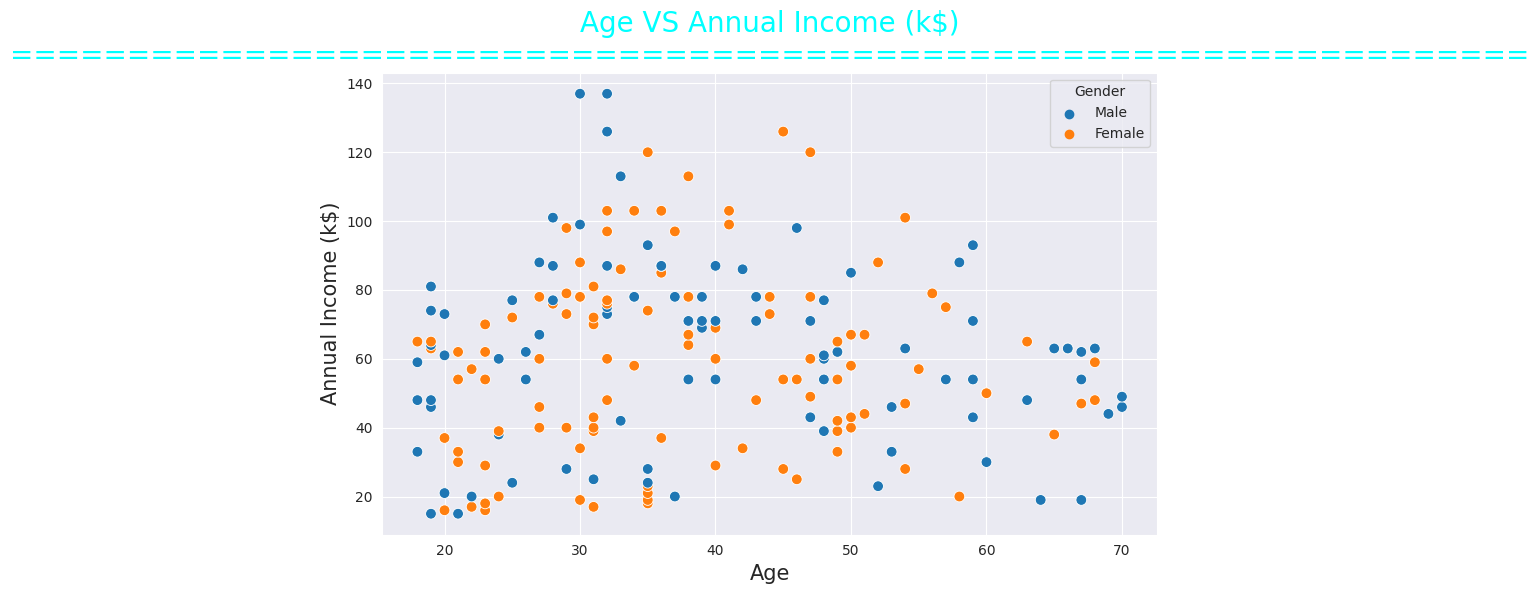

In [22]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=customerStore, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n=================================================================", fontsize=20, color="aqua")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

Clustering The Data

In [23]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = customerStore.loc[:,selected_cols]

In [24]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

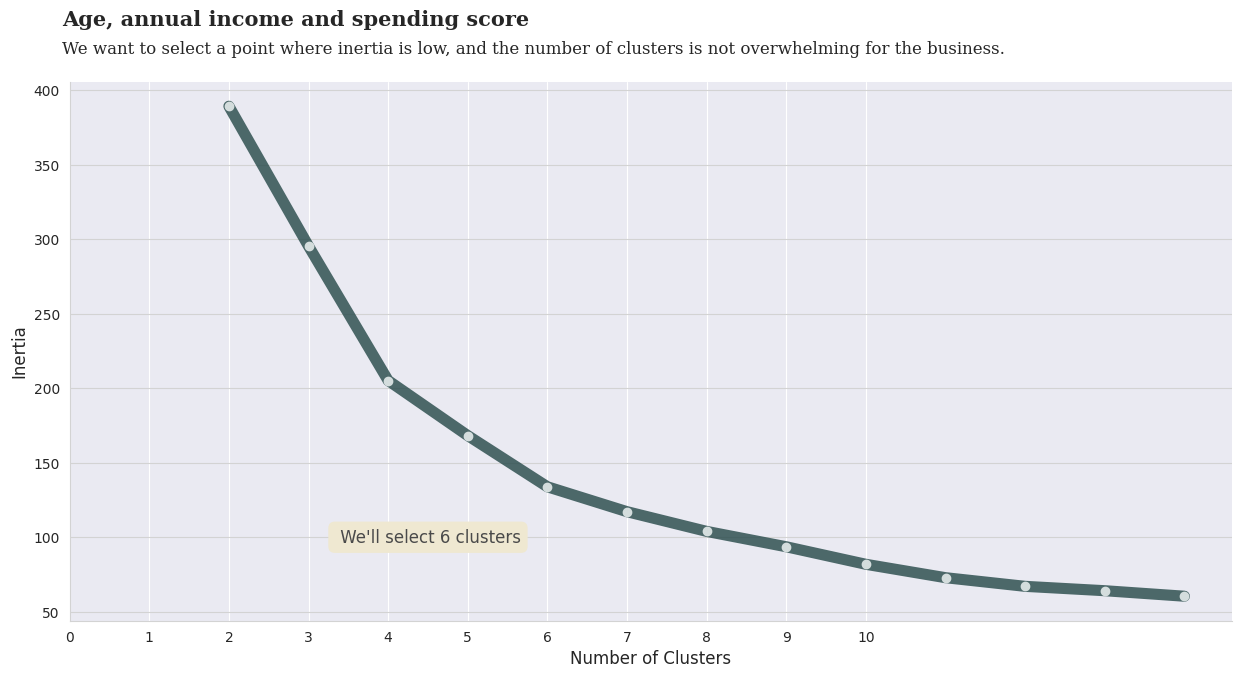

In [25]:
fig, ax = plt.subplots(figsize=(15,7))

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')

##
plt.xlabel('Number of Clusters',fontsize=12) , plt.ylabel('Inertia',fontsize=12)
ax.xaxis.set_ticks(np.arange(0,11,1))

# Title & Subtitle
fig.text(0.12,0.96,'Age, annual income and spending score', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.12,0.92,'We want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.',fontfamily='serif',fontsize=12)


ax.annotate(" We'll select 6 clusters",
            xy=(4.5, 100), fontsize=12,
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Ax spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for s in ['left', 'bottom']:
    ax.spines[s].set_color('lightgray')

# Grid
ax.set_axisbelow(True)# Ax spines

ax.yaxis.grid(color='lightgray', linestyle='-')
plt.show()

In [26]:
df_scaled = customerStore[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [27]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [28]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [29]:
# Suppress Warning

import warnings
warnings.filterwarnings("ignore")

In [30]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [31]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [32]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

The Elbow Curve

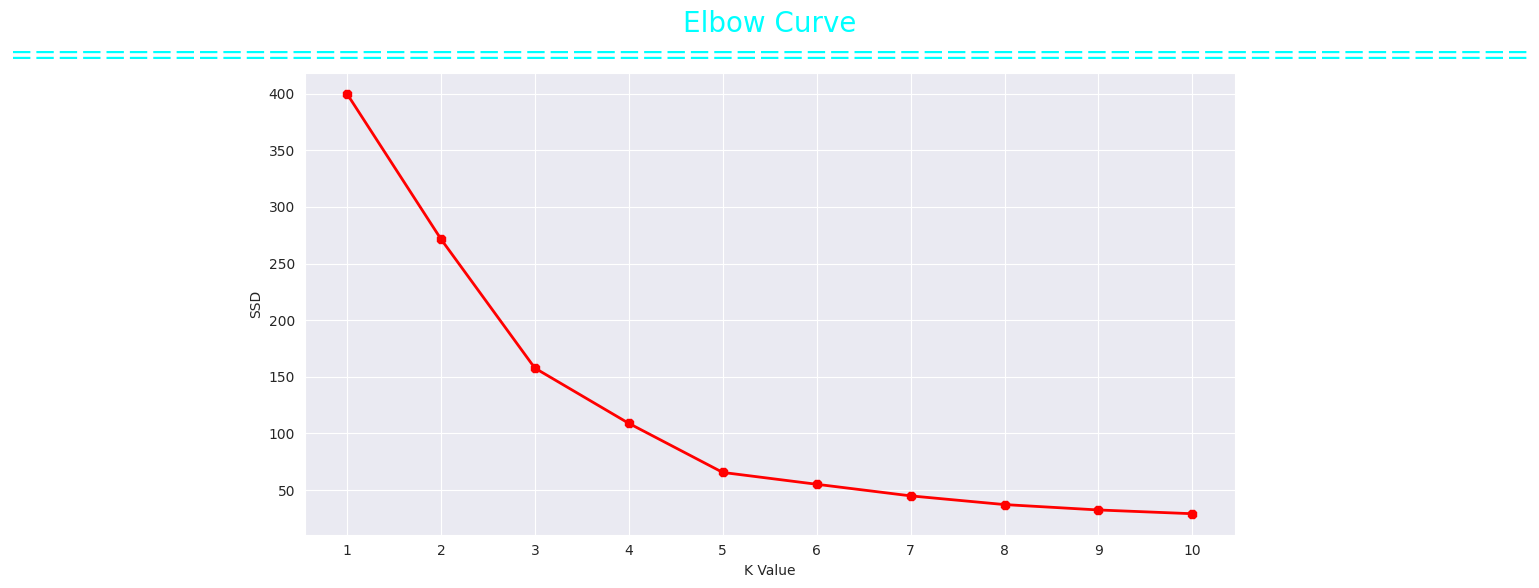

In [33]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="aqua")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [34]:
# K=5

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [35]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [36]:
customerStore["Label"] = kmeans.labels_

In [37]:
customerStore.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender 1/0,age_band,Label
0,1,Male,19,15,39,Young,1,10 ~ 20,0
1,2,Male,21,15,81,Young,1,20 ~ 30,4
2,3,Female,20,16,6,Young,0,20 ~ 30,0
3,4,Female,23,16,77,Adult,0,20 ~ 30,4
4,5,Female,31,17,40,Adult,0,30 ~ 40,0


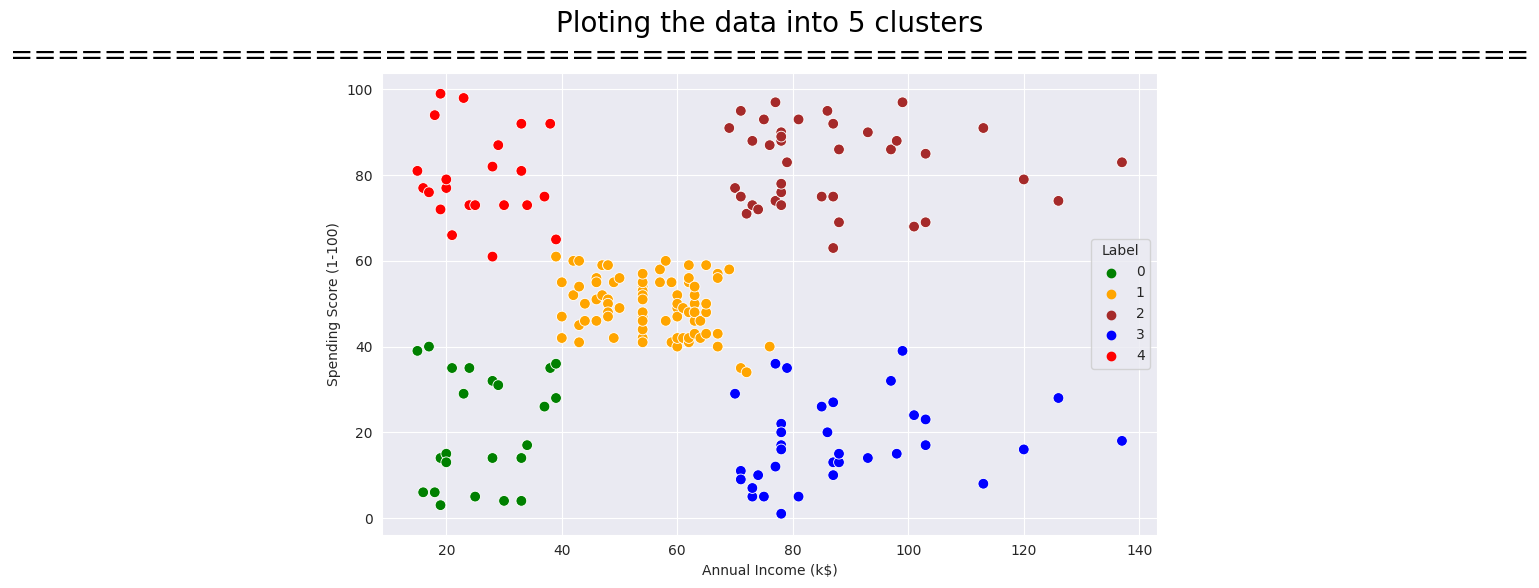

In [38]:
# ScatterPlot when K=5

plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="black")
sns.scatterplot(data=customerStore, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

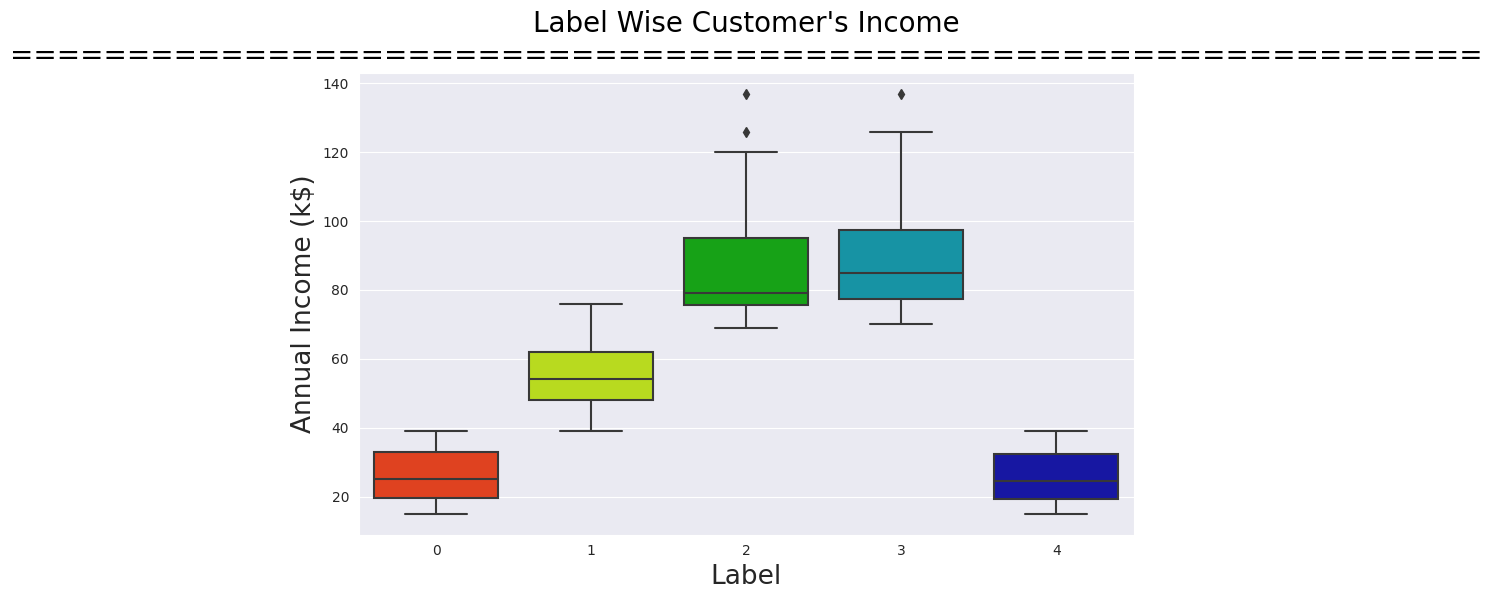

In [39]:
# plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=customerStore, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="black")
plt.xlabel(xlabel="Label", fontsize=19)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=19)
plt.show()

In [40]:
# Getting the CustomerId for each group

cust1 = customerStore[customerStore.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = customerStore[customerStore.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = customerStore[customerStore.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = customerStore[customerStore.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = customerStore[customerStore.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

The number of customers in 1st group =  23
The Customer Id are -  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

The number of customers in 2nd group =  81
The Customer Id are -  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

The number of customers in 3rd group =  39
The Customer Id are -  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

The number of customers in 4th group =  35
The Customer Id are -  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

The number of customers in 5

In [41]:
customerStore.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender 1/0,age_band,Label
0,1,Male,19,15,39,Young,1,10 ~ 20,0
1,2,Male,21,15,81,Young,1,20 ~ 30,4
2,3,Female,20,16,6,Young,0,20 ~ 30,0
3,4,Female,23,16,77,Adult,0,20 ~ 30,4
4,5,Female,31,17,40,Adult,0,30 ~ 40,0


In [42]:
var_list_1 = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [43]:
var_list_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [44]:
# Model Fitting

kmeans1 = KMeans(n_clusters=5, max_iter=50)
kmeans1.fit(var_list_1)

KMeans(max_iter=50, n_clusters=5)

In [45]:
kmeans1.labels_

array([1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 4, 1, 1, 1, 0, 0, 0, 0, 1, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [46]:
customerStore["Label"] = kmeans1.labels_
customerStore.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender 1/0,age_band,Label
0,1,Male,19,15,39,Young,1,10 ~ 20,1
1,2,Male,21,15,81,Young,1,20 ~ 30,1
2,3,Female,20,16,6,Young,0,20 ~ 30,3
3,4,Female,23,16,77,Adult,0,20 ~ 30,1
4,5,Female,31,17,40,Adult,0,30 ~ 40,1


In [47]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)

    ssd.append(kmeans1.inertia_)

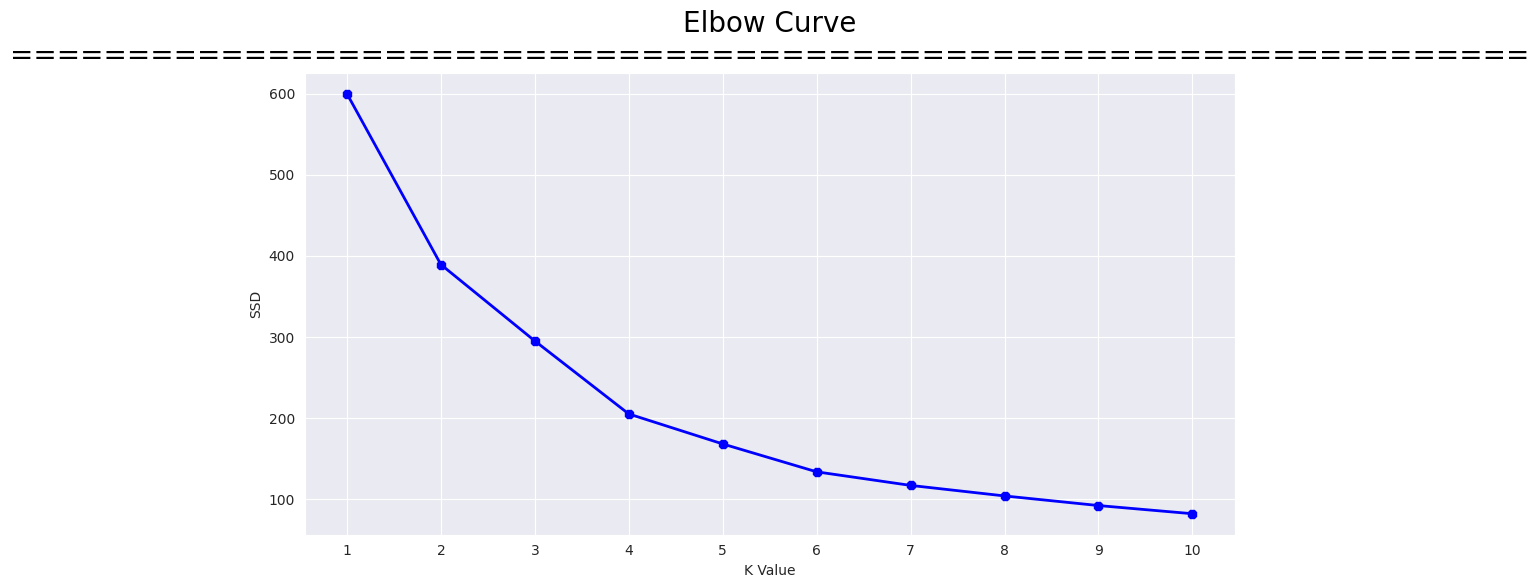

In [48]:
# Elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="blue", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="black")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [49]:
from mpl_toolkits.mplot3d import Axes3D

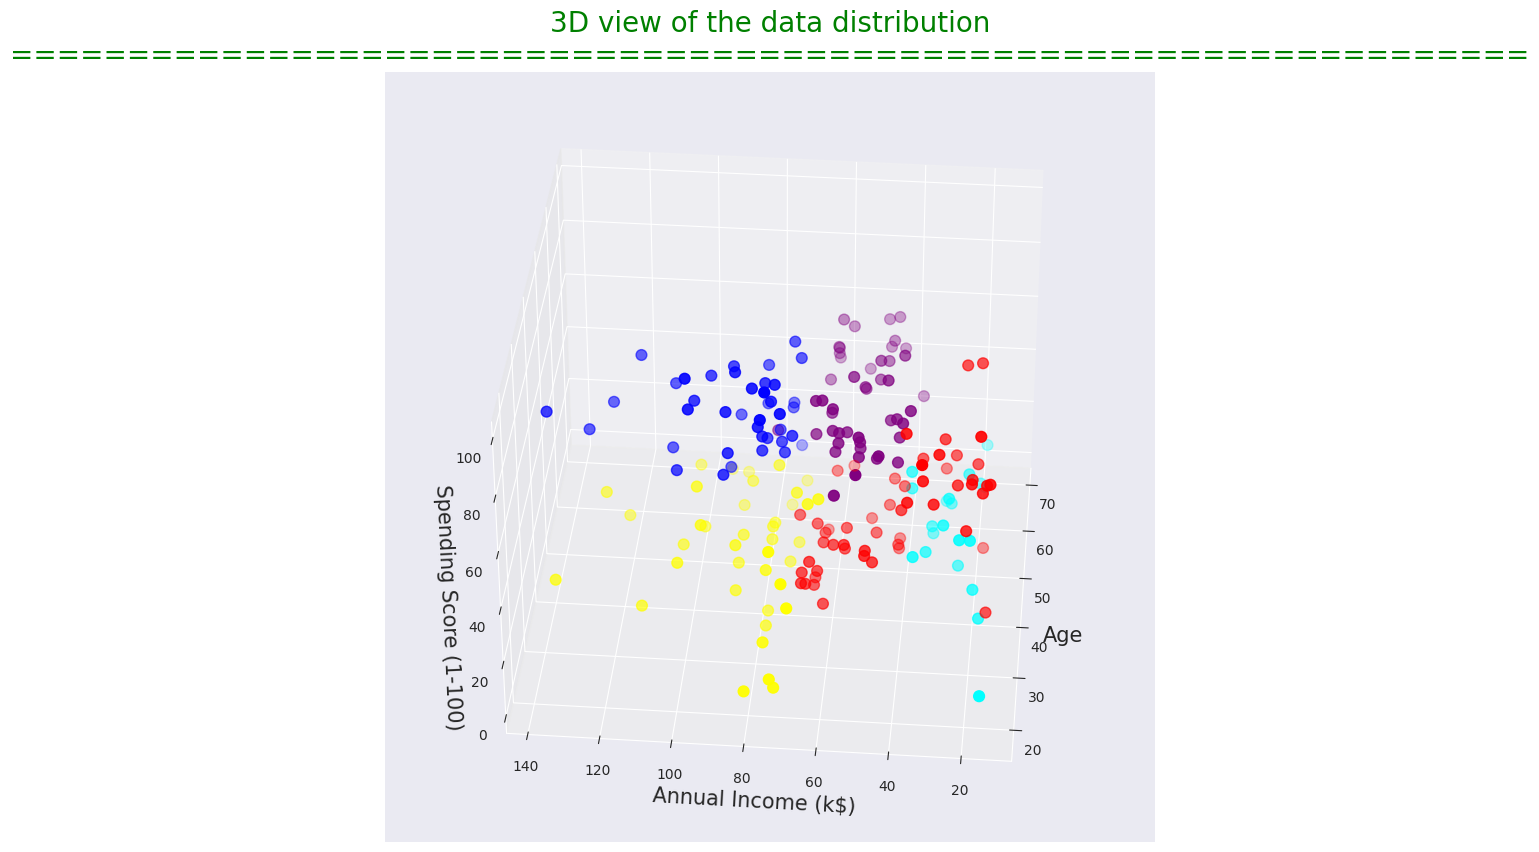

In [50]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customerStore.Age[customerStore.Label == 0], customerStore["Annual Income (k$)"][customerStore.Label == 0], customerStore["Spending Score (1-100)"][customerStore.Label == 0], c='purple', s=60)
ax.scatter(customerStore.Age[customerStore.Label == 1], customerStore["Annual Income (k$)"][customerStore.Label == 1], customerStore["Spending Score (1-100)"][customerStore.Label == 1], c='red', s=60)
ax.scatter(customerStore.Age[customerStore.Label == 2], customerStore["Annual Income (k$)"][customerStore.Label == 2],customerStore["Spending Score (1-100)"][customerStore.Label == 2], c='blue', s=60)
ax.scatter(customerStore.Age[customerStore.Label == 3], customerStore["Annual Income (k$)"][customerStore.Label == 3], customerStore["Spending Score (1-100)"][customerStore.Label == 3], c='aqua', s=60)
ax.scatter(customerStore.Age[customerStore.Label == 4], customerStore["Annual Income (k$)"][customerStore.Label == 4], customerStore["Spending Score (1-100)"][customerStore.Label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distribution\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()

In [51]:
# Printing the customerID according to the groups.

cust1 = customerStore[customerStore.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = customerStore[customerStore.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = customerStore[customerStore.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = customerStore[customerStore.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = customerStore[customerStore.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

The number of customers in 1st group =  47
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]

The number of customers in 2nd group =  54
The Customer Id are -  [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]

The number of customers in 3rd group =  40
The Customer Id are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The number of customers in 4th group =  20
The Customer Id are -  [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]

The number of customers in 5th group =  39
The Customer Id are -  [113 122 125 127 129 131 133

End